In [1]:
import numpy as np
import pandas as pd
from os import path
from random import choice, shuffle

from ga4stpg.graph import Graph, ReaderORLibrary
from ga4stpg.graph.steiner import (prunning_mst, shortest_path,
                            shortest_path_origin_prim,
                            prunning_kruskal_mst,
                            shortest_path_with_origin)

from ga4stpg.graph.util import (is_steiner_tree, 
                                has_cycle)


In [2]:
from ga4stpg.tree.pxcrossover import PXTree
from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedPrimRST

In [3]:
# input
input_file = 'steinc5.txt'

filename = path.join('..', 'datasets','ORLibrary', input_file)

assert path.exists(filename)

reader = ReaderORLibrary()

stpg = reader.parser(filename)

In [4]:
crossover = PXTree(stpg)
evaluator = EvaluateTreeGraph(stpg)
generator = GenerateBasedPrimRST(stpg)

In [5]:
%%time

data = list()
print(stpg.nro_nodes)

for _ in range(200):
    
    aa = generator()
    is_aa_st, _ = is_steiner_tree(aa, stpg)
    aa_cost, _ = evaluator(aa)

    
    bb = generator()
    is_bb_st, _ = is_steiner_tree(bb, stpg)
    bb_cost, _ = evaluator(bb)
    
    child = crossover(aa, bb)
    cc_cost, _ = evaluator(child)
    is_cc_st, _ = is_steiner_tree(child, stpg)
    
    data.append([is_aa_st, is_bb_st, is_cc_st, aa_cost, bb_cost, cc_cost])

500
Wall time: 13.7 s


In [6]:
%%time

col = ['is_aa_st', 
    'is_bb_st', 
    'is_cc_st' ,
    'a_cost', 
    'b_cost', 
    'c_cost'
    ]

frame = pd.DataFrame(data, columns=col)

Wall time: 3 ms


In [7]:
frame['less_both'] = (frame['c_cost'] < frame['a_cost']) & (frame['c_cost'] < frame['b_cost'])

In [8]:
frame['less_equal_both'] = (frame['c_cost'] <= frame['a_cost']) & (frame['c_cost'] <= frame['b_cost'])

In [9]:
frame['less_equal_a'] = (frame['c_cost'] <= frame['a_cost'])

In [10]:
frame['less_equal_b'] = (frame['c_cost'] <= frame['b_cost'])

In [11]:
frame.head()

,is_aa_st,is_bb_st,is_cc_st,a_cost,b_cost,c_cost,less_both,less_equal_both,less_equal_a,less_equal_b
0,False,False,False,2698,2804,2696,True,True,True,True
1,False,False,False,2713,2718,2713,False,True,True,True
2,False,False,False,2785,2742,2734,True,True,True,True
3,False,False,False,2772,2766,2767,False,False,True,False
4,False,False,False,2733,2764,2722,True,True,True,True


In [12]:

# all solutions were classified as steiner tree

# np.all(frame['is_aa_st'])
# np.all(frame['is_bb_st'])
# np.all(frame['is_cc_st'])

frame[['is_aa_st',	'is_bb_st',	'is_cc_st']].describe()

,is_aa_st,is_bb_st,is_cc_st
count,200,200,200
unique,1,1,1
top,False,False,False
freq,200,200,200


In [13]:
frame[['a_cost', 'b_cost','c_cost']].max()

a_cost    2807
b_cost    2847
c_cost    2794
dtype: int64

In [14]:
frame[['a_cost', 'b_cost','c_cost']].min()

a_cost    2679
b_cost    2674
c_cost    2665
dtype: int64

In [15]:
frame[['a_cost', 'b_cost','c_cost']].describe()

,a_cost,b_cost,c_cost
count,200.000000,200.000000,200.000000
mean,2740.990000,2739.320000,2717.170000
std,29.123026,28.390982,25.757686
min,2679.000000,2674.000000,2665.000000
25%,2718.000000,2719.000000,2699.750000
50%,2737.500000,2738.000000,2714.000000
75%,2765.250000,2761.250000,2733.000000
max,2807.000000,2847.000000,2794.000000


In [16]:
frame['diff_from_a'] = frame['a_cost'] - frame['c_cost']
frame['diff_from_b'] = frame['b_cost'] - frame['c_cost']

In [17]:
frame[['diff_from_a', 'diff_from_b']].describe()

,diff_from_a,diff_from_b
count,200.000000,200.000000
mean,23.820000,22.150000
std,23.305004,26.062497
min,0.000000,-35.000000
25%,8.000000,6.000000
50%,14.500000,15.500000
75%,36.000000,35.250000
max,113.000000,108.000000


<AxesSubplot:>

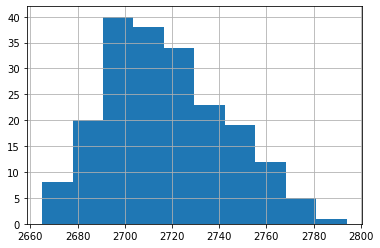

In [18]:
frame['c_cost'].hist()

<AxesSubplot:>

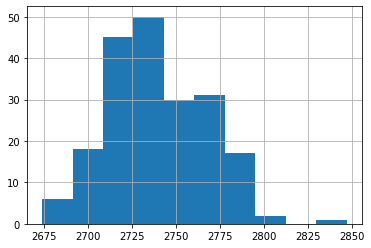

In [19]:
frame['b_cost'].hist()

<AxesSubplot:>

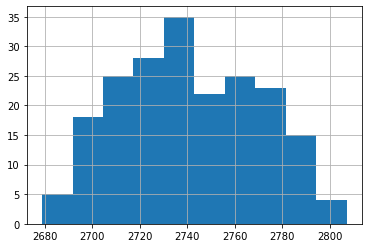

In [20]:
frame['a_cost'].hist()

<AxesSubplot:>

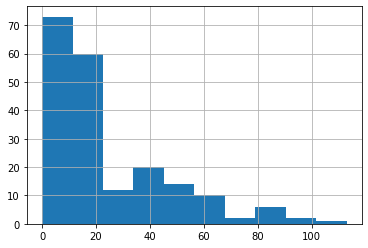

In [21]:
frame['diff_from_a'].hist()

<AxesSubplot:>

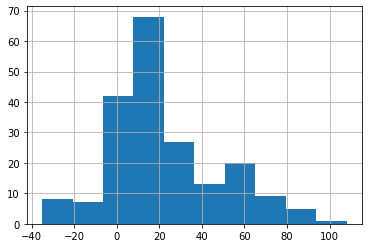

In [22]:
frame['diff_from_b'].hist()